# Previous application data cleaning

In [15]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import modules.missing as ms
import warnings
warnings.filterwarnings('ignore')

## Load data

In [16]:
prev_app = pd.read_csv('.././data/previous_application.csv')

## Preliminary data analysis

In [17]:
pd.set_option('display.max_columns', None)

display(prev_app.sample(10))
print(f'Previous Application data contains:\n{prev_app.shape[0]} rows and {prev_app.shape[1]} columns')
print(f'\Previous Application data information:\n')
print(prev_app.info())
print(f'\nStatistical Summary of numerical columns:\n')

numerical = prev_app.select_dtypes(include='number')
display(numerical.describe())

categorical = prev_app.select_dtypes(include='object')
display(categorical.describe())

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
415065,2568581,244186,Cash loans,NaN,0.000,0.0,NaN,NaN,MONDAY,10,Y,1,NaN,NaN,NaN,XNA,Canceled,-235,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1617623,2033456,179209,Consumer loans,9853.245,67820.715,54256.5,13564.215,67820.715,MONDAY,8,Y,1,0.217819,NaN,NaN,XAP,Approved,-1323,Cash through the bank,XAP,Family,New,Construction Materials,POS,XNA,Stone,60,Construction,6.0,low_normal,POS industry with interest,365243.0,-1292.0,-1142.0,-1142.0,-1135.0,0.0
906762,1344654,179640,Cash loans,6682.140,67500.000,85090.5,NaN,67500.000,SATURDAY,12,Y,1,NaN,NaN,NaN,Other,Refused,-548,Cash through the bank,SCO,Unaccompanied,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),5,XNA,18.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,NaN
1009226,2233843,205269,Cash loans,26833.500,225000.000,225000.0,NaN,225000.000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-994,Cash through the bank,XAP,Other_B,New,XNA,Cash,walk-in,Country-wide,40,Connectivity,12.0,high,Cash Street: high,365243.0,-964.0,-634.0,-634.0,-627.0,0.0
896867,2599280,229126,Cash loans,NaN,0.000,0.0,NaN,NaN,WEDNESDAY,17,Y,1,NaN,NaN,NaN,XNA,Canceled,-331,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1500607,1941007,182983,Consumer loans,9782.865,149220.000,149220.0,0.000,149220.000,WEDNESDAY,13,Y,1,0.000000,NaN,NaN,XAP,Approved,-882,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Stone,83,Consumer electronics,18.0,low_normal,POS household with interest,365243.0,-836.0,-326.0,-326.0,-318.0,0.0
1078897,1137412,119570,Consumer loans,2307.870,16155.000,15732.0,1620.000,16155.000,TUESDAY,17,Y,1,0.101679,NaN,NaN,XAP,Approved,-1768,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,39,Connectivity,10.0,high,POS mobile with interest,365243.0,-1734.0,-1464.0,-1464.0,-1420.0,0.0
431866,2578824,421013,Cash loans,NaN,0.000,0.0,NaN,NaN,MONDAY,10,Y,1,NaN,NaN,NaN,XNA,Canceled,-304,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1456886,2302471,245112,Cash loans,NaN,0.000,0.0,NaN,NaN,MONDAY,9,Y,1,NaN,NaN,NaN,XNA,Canceled,-284,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
697620,1680028,128497,Cash loans,NaN,0.000,0.0,NaN,NaN,TUESDAY,10,Y,1,NaN,NaN,NaN,XNA,Canceled,-67,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


Previous Application data contains:
1670214 rows and 37 columns
\Previous Application data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 1

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


## Duplicate Checking

In [18]:
dup = prev_app.duplicated().sum()
print(f'Duplicate rows in previous application data: {dup}')

Duplicate rows in previous application data: 0


## Missing values checking and handling

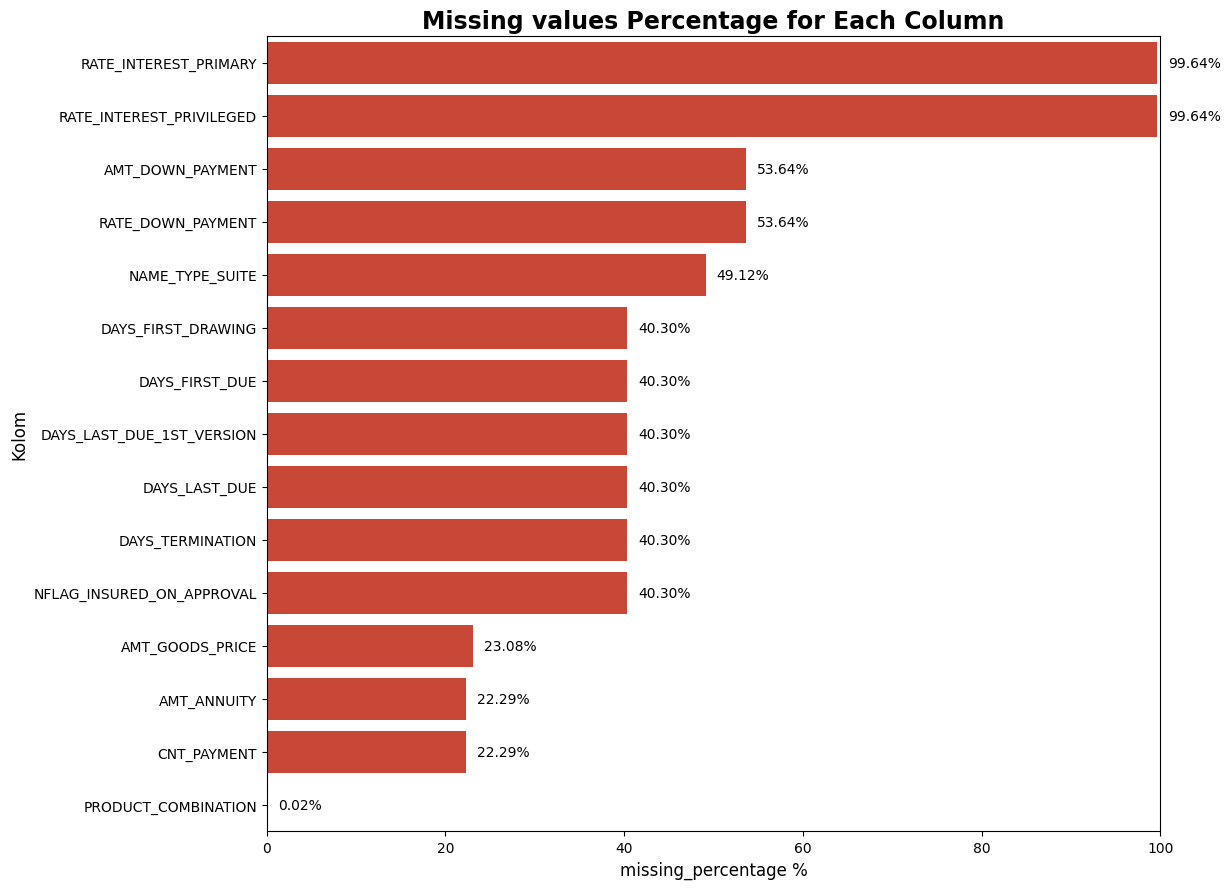

In [19]:
ms.plot_missing_percentage(prev_app)

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

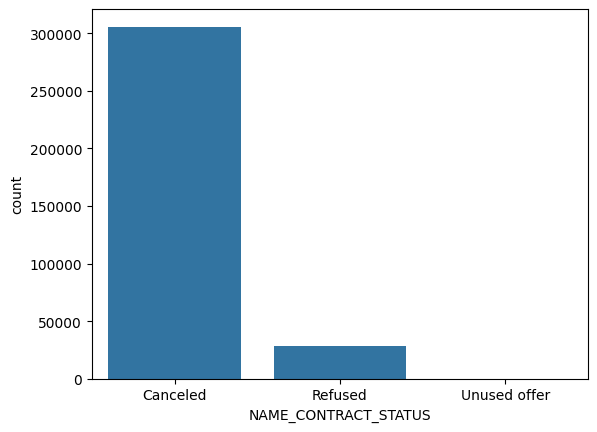

In [20]:
gprice = prev_app.loc[(prev_app.AMT_GOODS_PRICE.isna()) & (prev_app.AMT_ANNUITY.isna() & (prev_app.CNT_PAYMENT.isna()))]
sns.countplot(x=gprice.NAME_CONTRACT_STATUS)

from the barplot above where the data is from `AMT_GOODS_PRICE`'s missing values, we can infer that the client that the contract status does not approved/canceled are the most with NaN `AMT_GOODS_PRICE`, even if when the `AMT_GOODS_PRICE` NaN and the contract status Approved, that is more likely that the client just dont apply loan for the goods price,
<br> **that's why i planned to fill the missing values of AMT_GOODS_PRICE with 0 value so the imputation is reasonable**

In [21]:
# Drop missing values more than 40%
pa_semiclean = ms.dropnan(prev_app, 0.4)
pa_clean = pa_semiclean.fillna(0)

In [22]:
pa_clean.to_csv('.././data/previous_application_clean.csv', index=False)